In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = "C:/Users/DMP LOG/Desktop/CVPR Assignment/CIFAR-10-images-master/train"

In [3]:
image_types = []

In [4]:
for i in os.listdir(train_dir):
    image_types.append(i)

In [5]:
print("Types of images in dataset: ")
print(image_types)

Types of images in dataset: 
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
train_data = []

In [7]:
for i in image_types:
    train_path = os.path.join(train_dir, i)
    class_type = i
    for image in tqdm(os.listdir(train_path)):
        train_data_arr = cv2.imread(os.path.join(train_path, image))
        grayscale_image_arr = cv2.cvtColor(train_data_arr, cv2.COLOR_BGR2GRAY)
        train_data.append([grayscale_image_arr, class_type])

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 8047.33it/s]


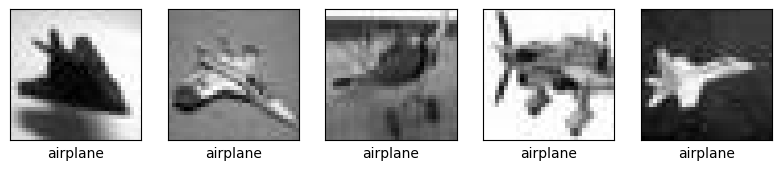

In [8]:
plt.figure(figsize=(20,5)) 
for i in range(5):
	plt.subplot(2,10,i+1) 
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}") 
plt.show()

In [9]:
random.shuffle(train_data)

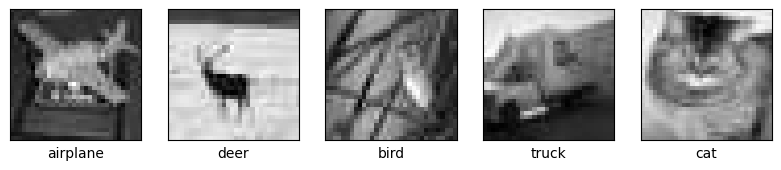

In [10]:
plt.figure(figsize=(20,5)) 
for i in range(5):
	plt.subplot(2,10,i+1) 
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}") 
plt.show()

In [11]:
f0 = train_data[0:1000]
f1 = train_data[1000:2000]
f2 = train_data[2000:3000]
f3 = train_data[3000:4000]
f4 = train_data[4000:5000]

In [ ]:
accuracies_manhattan = []
accuracies_euclidean = []

for k in range(1, 5):
    fold_accuracies_manhattan = []
    fold_accuracies_euclidean = []
    # Perform 5-fold cross-validation
    for i in range(5):
        # Divide data into training and validation sets based on the fold
        if i == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif i == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif i == 2:
            train = f1 + f0 + f3 + f4
            validation = f2
        elif i == 3:
            train = f1 + f2 + f0 + f4
            validation = f3
        elif i == 4:
            train = f1 + f2 + f3 + f0
            validation = f4
    
        correct_manhattan = 0
        correct_euclidean = 0
        total = 0
    
        for v in validation:
            distances_manhattan = []
            distances_euclidean = []
    
            for t in train:
                l1_dist = np.sum(np.abs(t[0] - v[0]))
                l2_dist = np.sqrt(np.sum((t[0] - v[0]) ** 2))
                distances_manhattan.append((l1_dist, t[1]))
                distances_euclidean.append((l2_dist, t[1]))
    
            distances_manhattan.sort()
            distances_euclidean.sort()
    
            neighbors_manhattan = [distances_manhattan[j][1] for j in range(k)]
            neighbors_euclidean = [distances_euclidean[j][1] for j in range(k)]
    
            prediction_manhattan = max(set(neighbors_manhattan), key=neighbors_manhattan.count)
            prediction_euclidean = max(set(neighbors_euclidean), key=neighbors_euclidean.count)
    
            if prediction_manhattan == v[1]:
                correct_manhattan += 1
            if prediction_euclidean == v[1]:
                correct_euclidean += 1
    
            total += 1
    
        accuracy_manhattan = correct_manhattan / total
        accuracy_euclidean = correct_euclidean / total
    
        fold_accuracies_manhattan.append(accuracy_manhattan)
        fold_accuracies_euclidean.append(accuracy_euclidean)
    
        print("Fold", i, "K =", k, "Manhattan Accuracy:", accuracy_manhattan)
        print("Fold", i, "K =", k, "Euclidean Accuracy:", accuracy_euclidean)
    
    accuracies_manhattan.append(fold_accuracies_manhattan)
    accuracies_euclidean.append(fold_accuracies_euclidean)


accuracies_manhattan = np.array(accuracies_manhattan)
accuracies_euclidean = np.array(accuracies_euclidean)

avg_accuracies_manhattan = np.mean(accuracies_manhattan, axis=1)
avg_accuracies_euclidean = np.mean(accuracies_euclidean, axis=1)

k_values = range(1, 5)
plt.plot(k_values, avg_accuracies_manhattan, label="Manhattan (L1) Distance")
plt.plot(k_values, avg_accuracies_euclidean, label="Euclidean (L2) Distance")
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for Different Distance Metrics')
plt.legend()
plt.show()

Fold 0 K = 1 Manhattan Accuracy: 0.179
Fold 0 K = 1 Euclidean Accuracy: 0.151
Fold 1 K = 1 Manhattan Accuracy: 0.168
Fold 1 K = 1 Euclidean Accuracy: 0.127
Fold 2 K = 1 Manhattan Accuracy: 0.18
Fold 2 K = 1 Euclidean Accuracy: 0.168
Fold 3 K = 1 Manhattan Accuracy: 0.167
Fold 3 K = 1 Euclidean Accuracy: 0.141
Fold 4 K = 1 Manhattan Accuracy: 0.177
Fold 4 K = 1 Euclidean Accuracy: 0.154
Fold 0 K = 2 Manhattan Accuracy: 0.169
Fold 0 K = 2 Euclidean Accuracy: 0.133
Fold 1 K = 2 Manhattan Accuracy: 0.164
Fold 1 K = 2 Euclidean Accuracy: 0.14
Fold 2 K = 2 Manhattan Accuracy: 0.169
Fold 2 K = 2 Euclidean Accuracy: 0.168
Fold 3 K = 2 Manhattan Accuracy: 0.177
Fold 3 K = 2 Euclidean Accuracy: 0.136
Fold 4 K = 2 Manhattan Accuracy: 0.162
Fold 4 K = 2 Euclidean Accuracy: 0.146
Fold 0 K = 3 Manhattan Accuracy: 0.171
Fold 0 K = 3 Euclidean Accuracy: 0.132
Fold 1 K = 3 Manhattan Accuracy: 0.172
Fold 1 K = 3 Euclidean Accuracy: 0.135
Fold 2 K = 3 Manhattan Accuracy: 0.176
Fold 2 K = 3 Euclidean Accu